**1. Import Libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. read csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# any results we write to current directory are saved as output

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
sns.set(style='whitegrid')

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

**2. Import dataset**

In [6]:
df=pd.read_csv(r"C:\Users\SHRUTHI\OneDrive\Desktop\FSDS\Assignments\Resume Projects\projects to do\pj1\heart.csv")

**3. Exploratory Data Analysis (EDA)**

In [8]:
# shape of the data set
print('The shape of the data set:',df.shape)

The shape of the data set: (303, 14)


In [9]:
# preview dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# to check only the data type of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# satistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* df.describe(include=['object']) # statistical properties of categorical data.
* df.descrine(include='all') # gives statistical properties of all the data no-matter of what type.

In [14]:
# view column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**4. Univariate Analysis**

Analysing target varible lets us know about patient having and not having heart diseases.

In [17]:
# check unique values in target column
df['target'].nunique()

2

In [18]:
# to view the unique values in target var
df['target'].unique()

array([1, 0], dtype=int64)

In [19]:
# frequency distribution of target variables
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

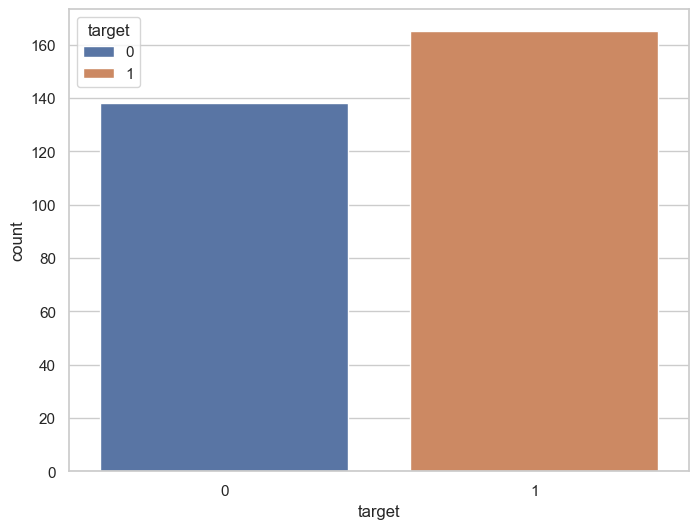

In [20]:
# visualize frequency distribution of target variables
f, ax= plt.subplots(figsize=(8,6))
ax= sns.countplot(x='target',data=df,hue='target')
plt.show()

The above plot visually represents:
* There are 165 patients with heart disease.
* There are 168 patients without heart disease.

In [22]:
# frquency distibution of target variable w.r.t sex.
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

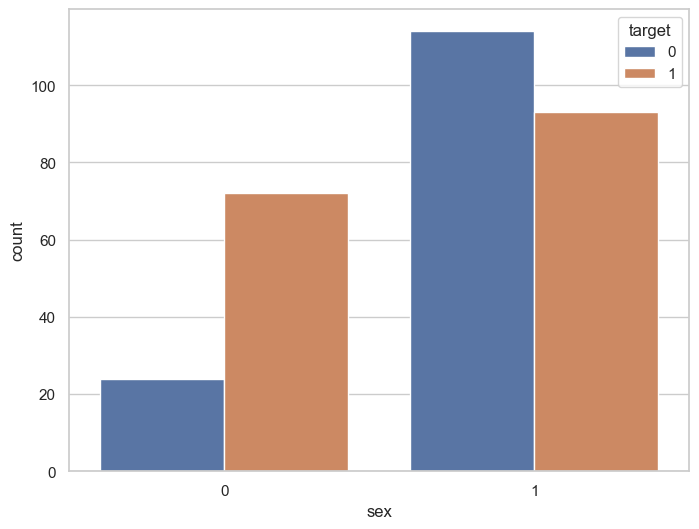

In [23]:
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='sex',hue='target',data=df)
plt.show()

* Here in sex 1 = male and 0 = female
* In target 1 = presence of heart disease and 0 = absence of heart disease
* The plot shows that
  * Out of 96 female, 72 have heart disease and 24 don't have heart disease
  * Out of 207 male, 93 have heart disease and 114 don't have heart disease
* From the above plot we can easily interpret that women tend to get heart disease more than men

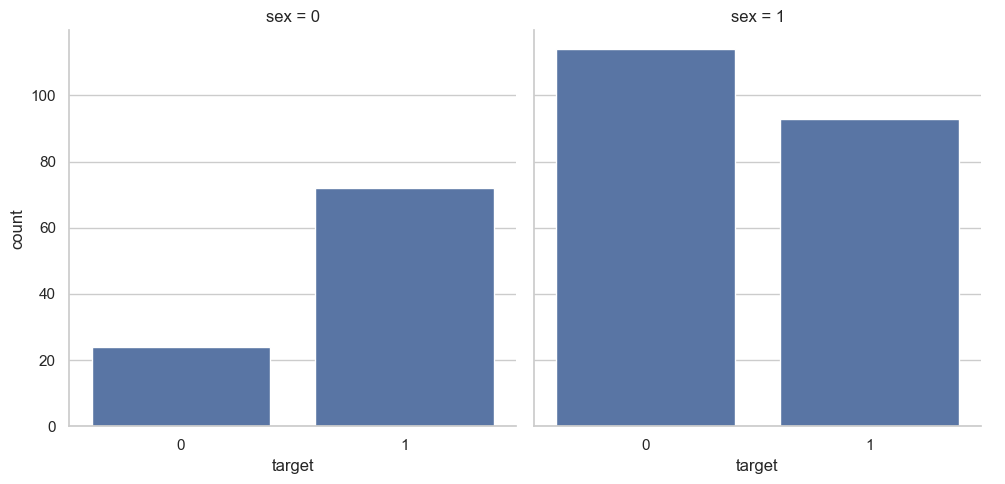

In [25]:
# alternative way to visualize the same
ax= sns.catplot(x='target',col='sex',data=df,kind='count',height=5,aspect=1)

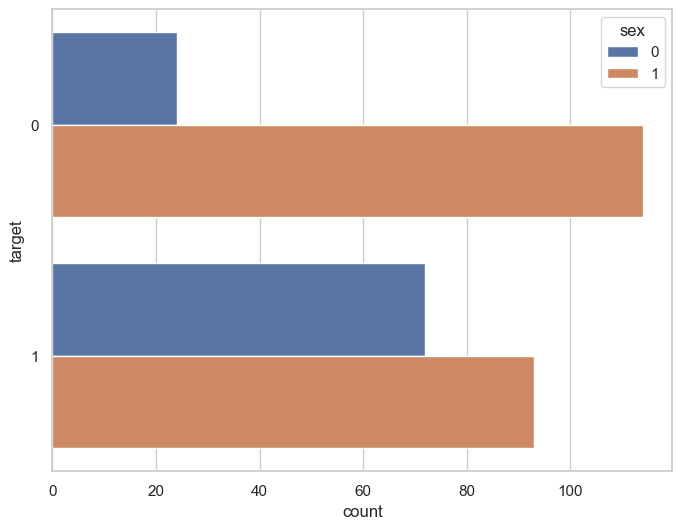

In [26]:
# to plot vertically
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(y='target',hue='sex',data=df)
plt.show()

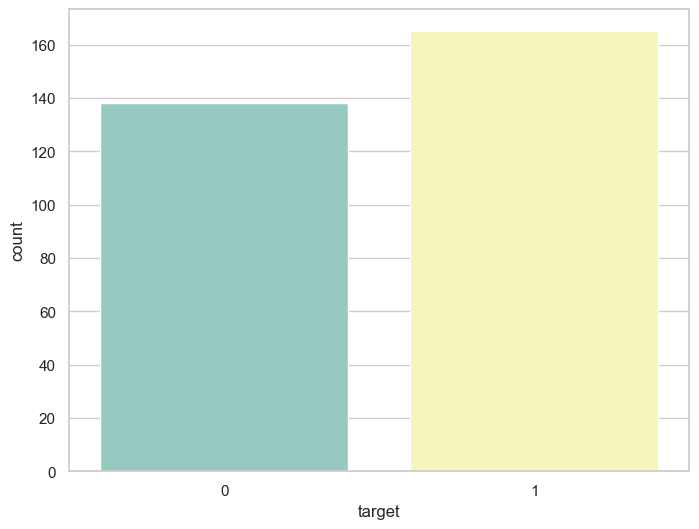

In [27]:
# Different color palette can be used as follows.
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='target',data=df, palette='Set3')
plt.show()

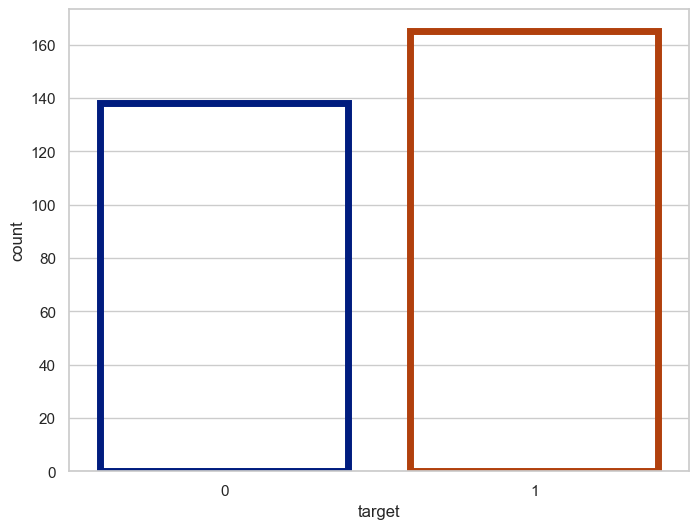

In [28]:
# we can use plt.bar keyword arguments for a different look.
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='target',data=df, facecolor=(0,0,0,0), linewidth=5, edgecolor=sns.color_palette('dark',3))
plt.show()

* target value distribution w.r.t fbs (fasting blood sugar)
* target value distribution w.r.t exang (exercise induced angina)

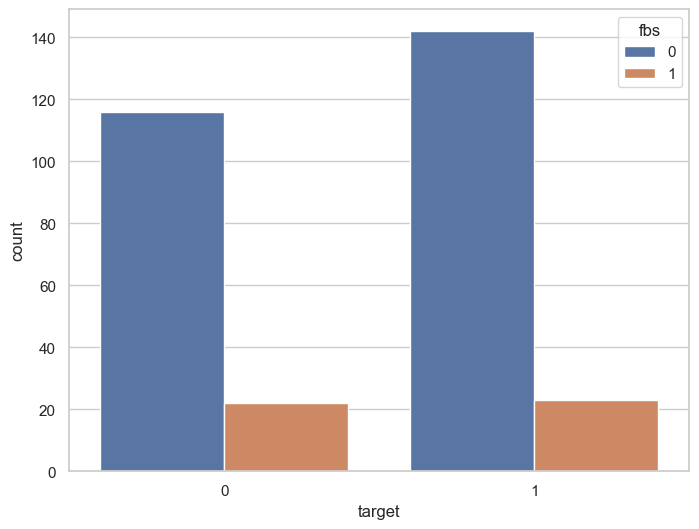

In [30]:
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='target',hue='fbs',data=df)
plt.show()

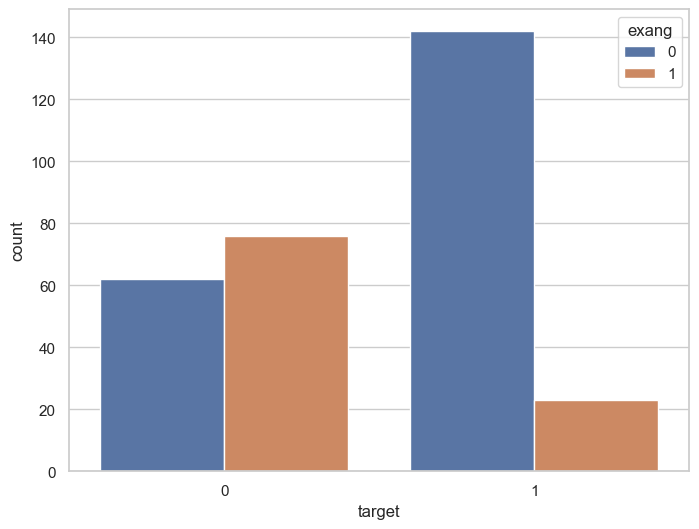

In [31]:
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='target',hue='exang',data=df)
plt.show()

**5. Bivariate Analysis**

**Estimate correlation coefficients:**
 * Since the data set is small we will use standard correlation coefficient(Person's) between every pair of attributes using the df.corr() method.

In [34]:
correlation=df.corr()

In [35]:
# since the target variable is 'target', we check how each attribute correlates with the target variable.
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Intepretation from correlation coeeficient.
* The correlation coefficient lies between -1 to +1. If it is +1 or nearer to it we say the variables are highly positively correlated. If it is -1 or nearer to -1 we say they are highly negatively correlated. Finally when it is zero, the variables are said to have no correlation between them.
* from the above data, we see that target anf fbs have no correlation between them. We can also observe that no variable is highly positively correlated or highly negatively correlated to target variable.
* Among all the other variables only cp and thalach seems to be nearer to +1. So, we analyze the interaction between these features anf the target variable.

**Analysis of target and cp variables.**

In [38]:
# cp stands for chest pain, we will find no.of unique values in cp.
df['cp'].nunique()

4

In [39]:
# to see what are the unique values of cp.
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [40]:
# no.of values corresponding to each unique variable.
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

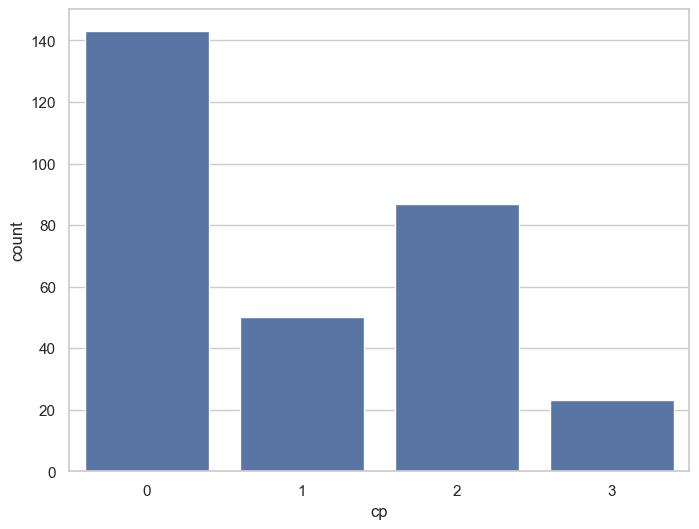

In [41]:
# visualize the frequency distibution of cp variable.
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='cp',data=df)
plt.show()

In [42]:
# frequency distribution of target variable w.r.t cp
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

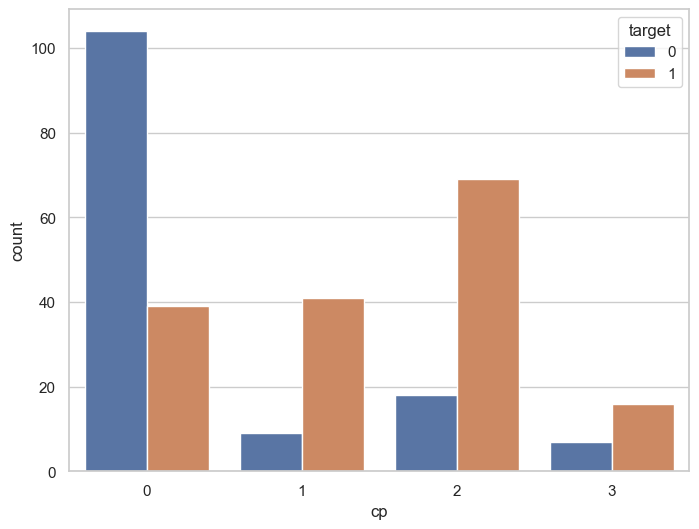

In [43]:
# visualize target w.r.t cp as follows:
f, ax=plt.subplots(figsize=(8,6))
ax= sns.countplot(x='cp',hue='target',data=df)
plt.show()

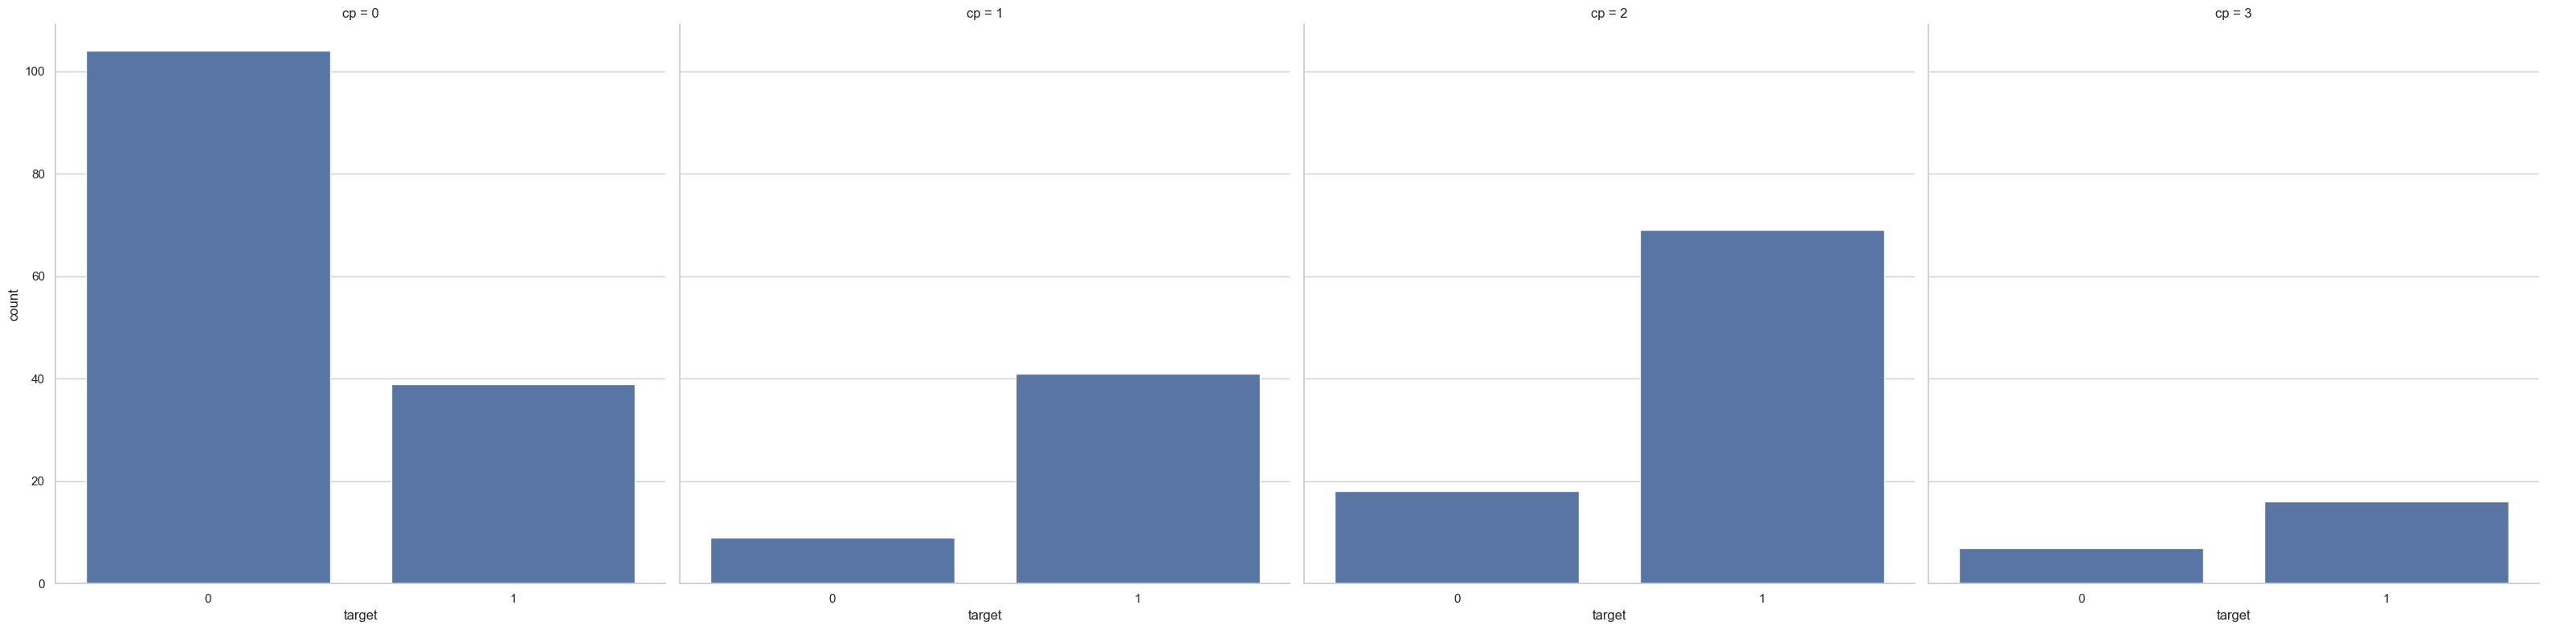

In [44]:
# the same can be visualized as follows:
sns.catplot(x='target',col='cp',data=df,kind='count',height=8,aspect=1)

**Analysis of target and thalach variables**

In [46]:
# thalach stands for maximum heart rate achived.
# to check no.of unique values of thalach
df['thalach'].nunique()

91

Since the no.of unique values in thalach feature is 91, it is a numerical variable. We visualize its frquency distribution as follows.

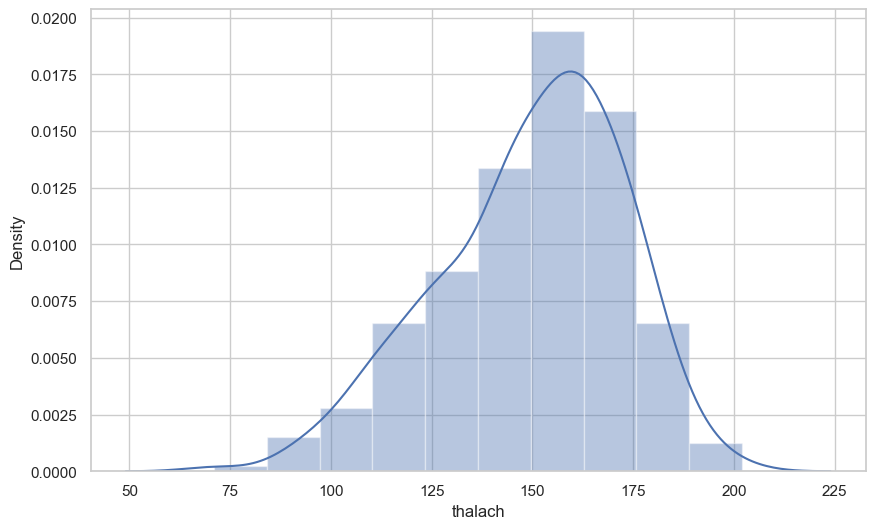

In [48]:
# visualize the frequency distribution of thalach variable.
f, ax= plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.show()

* We observe that thalach variable is slightly negatively skewed.
* Pandas series object is used to get an informative axis lable as follows:

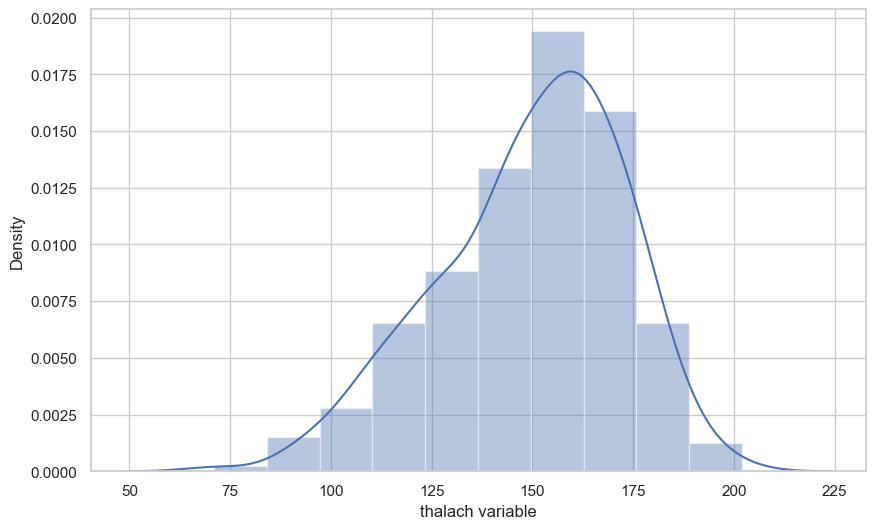

In [50]:
f, ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax= sns.distplot(x,bins=10)
plt.show()

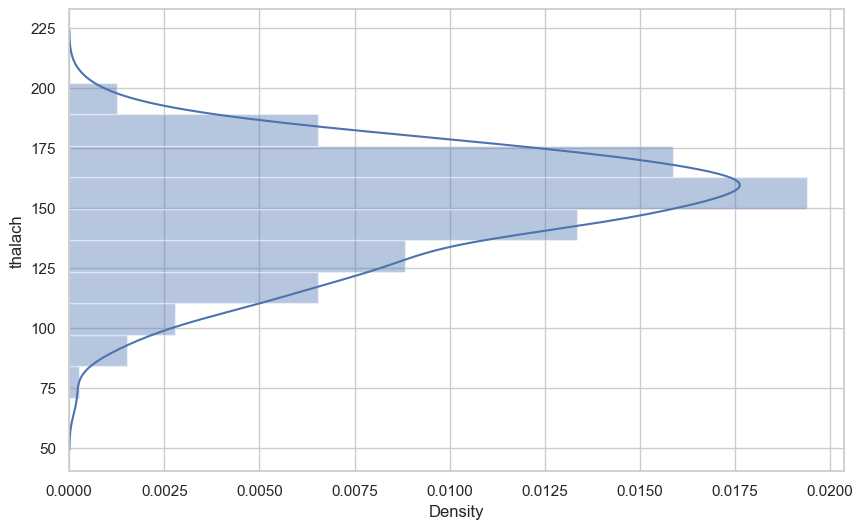

In [51]:
# plot the distibution in vertical axis.
f,ax= plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10,vertical=True)
plt.show()

**Seaborn Kernal Density Estimate (KDE) Plot**
* The KDE plot is used to plot the shape of the distibution.
* It plots the density of observations on one axis with height along the other axis

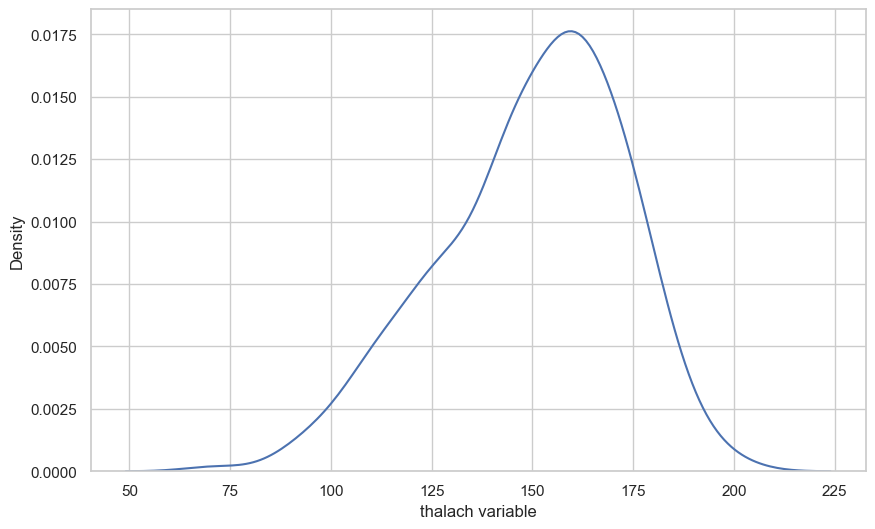

In [53]:
f, ax= plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax= sns.kdeplot(x)
plt.show()

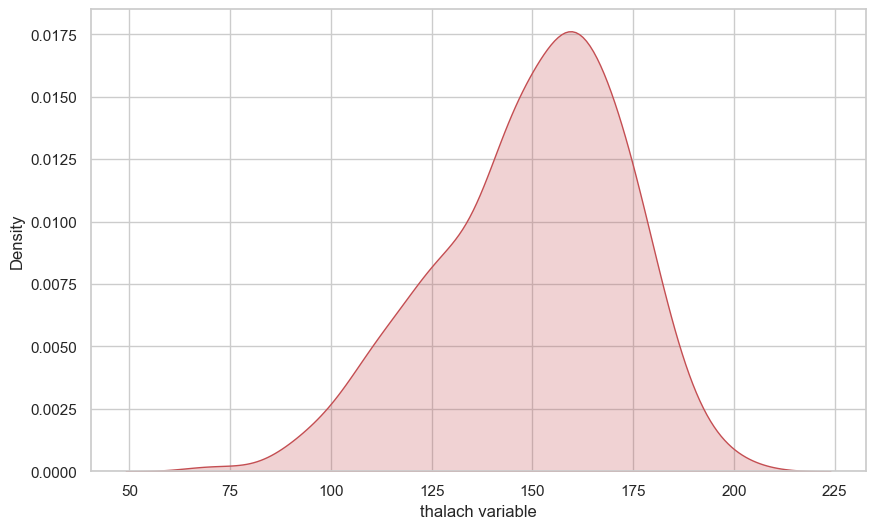

In [54]:
# we can shade under the density curve and use diifernt color as follows:
f, ax= plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax= sns.kdeplot(x, shade= True, color='r')
plt.show()

**Histogram**
* A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the no.of observations that fall in each bin

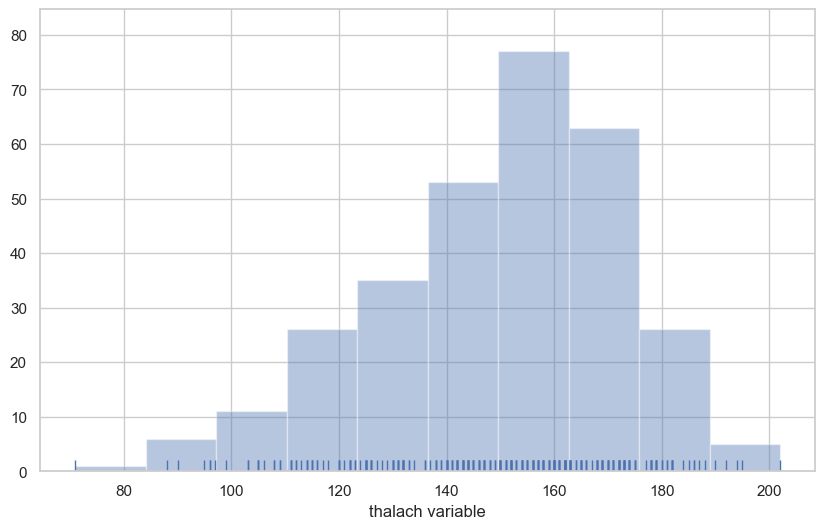

In [56]:
f, ax= plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax= sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

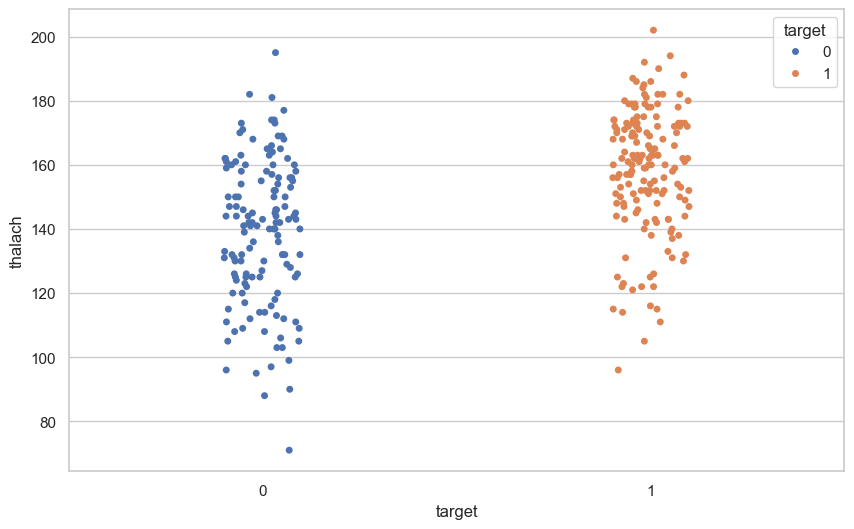

In [57]:
# visualize frequency distribution of thalach and target variable.
f, ax= plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df,hue='target')
plt.show()

Interpretation
* people who suffer from heart disease tend to have higher heart rate (talach) can be observed from the above plot.

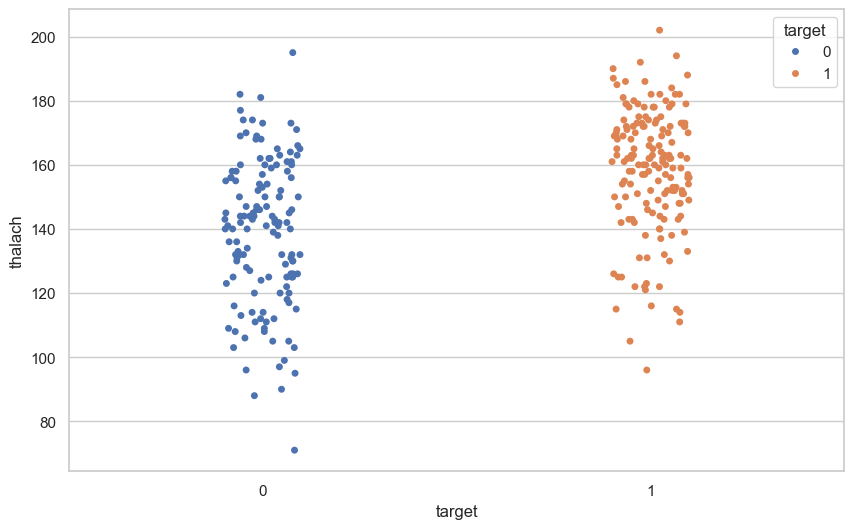

In [59]:
# we can add jitter to bring out the distribution of values.
f, ax= plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=df,jitter=0.1,hue='target')
plt.show()

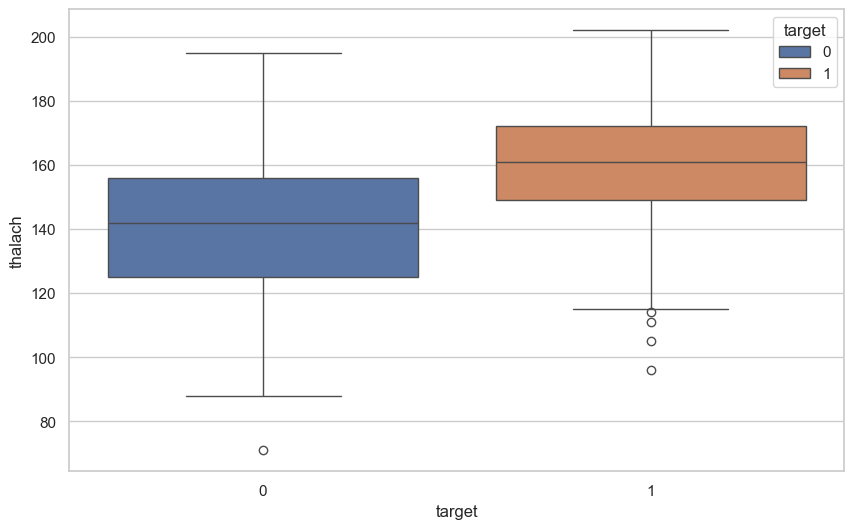

In [60]:
# visualize distribution of thalach and target w.r.t boxplot.
f, ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='target',y='thalach',data=df,hue='target')
plt.show()

Interpretation 
* The above boxplot confirms that people suffering from heart disease have relatively higher heart rate as compared to people who are not suffering with heart disease.

**6. Multivariate Analysis**

* The objective of multivariate analysis is to discover patterns and relationships in the dataset, which is also an important step of EDA.
* We will use heat map and pair plot to discover the patterns and relationships in the data set.

**Heat Map**

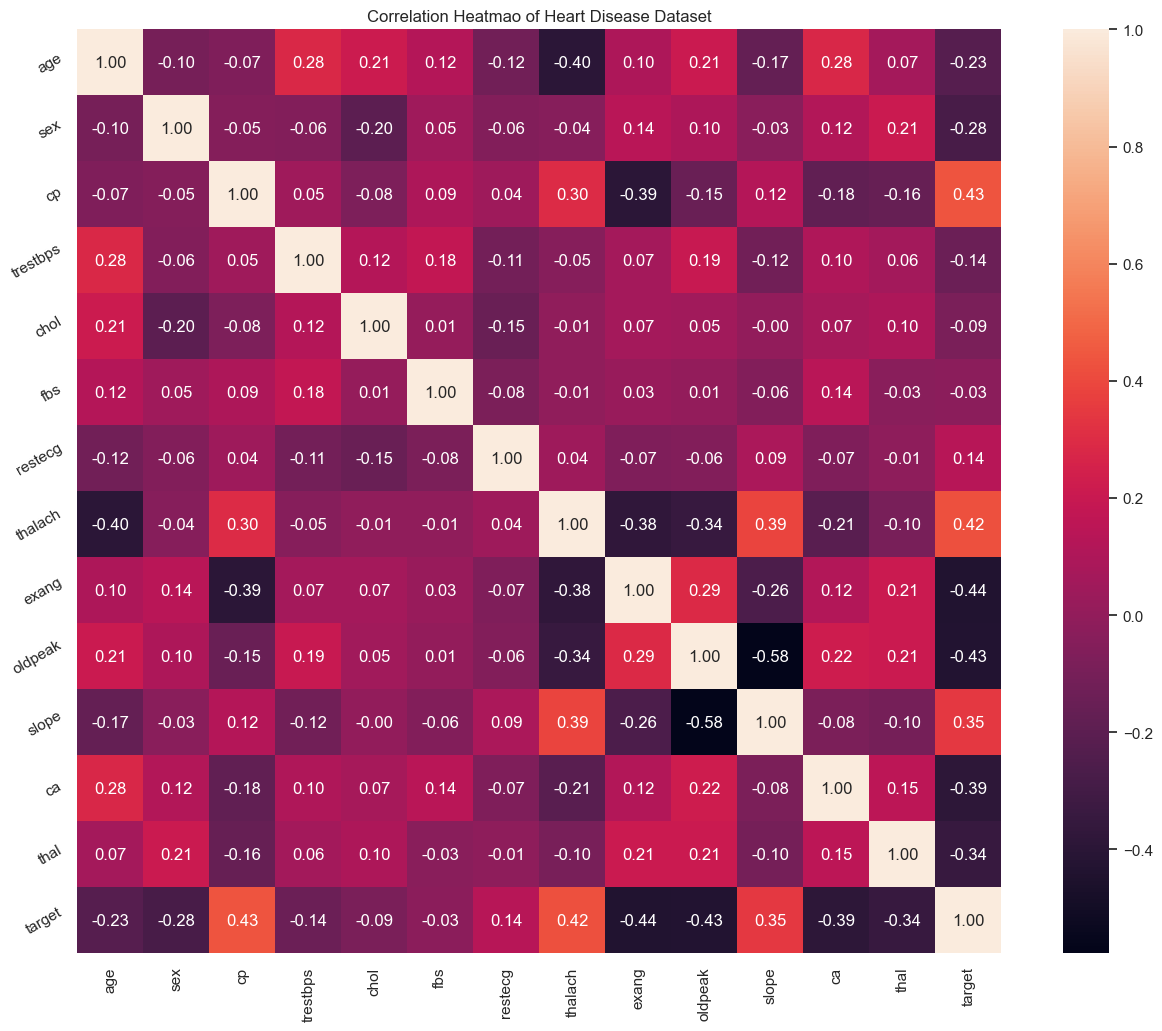

In [65]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmao of Heart Disease Dataset')
a=sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

**Interpretation**
 * cp and thalach are midly positively correlated with target with a correlation coefficient of 0.43 and 0.42.
 * slope is weakly positively correlated with target with correlation coeeficient 0.35.
 * exang and oldpeak are midly negatively correlated with target with a correlation coefficient of -0.44 and -0.43.
 * ca and thal are weakly negatively correlated with target with correlation coeeficient -0.39 and -0.34.
 * fbs and chol have almost no correlation with target with correlation coeeficient -0.03 and -0.09

**Pair Plot**

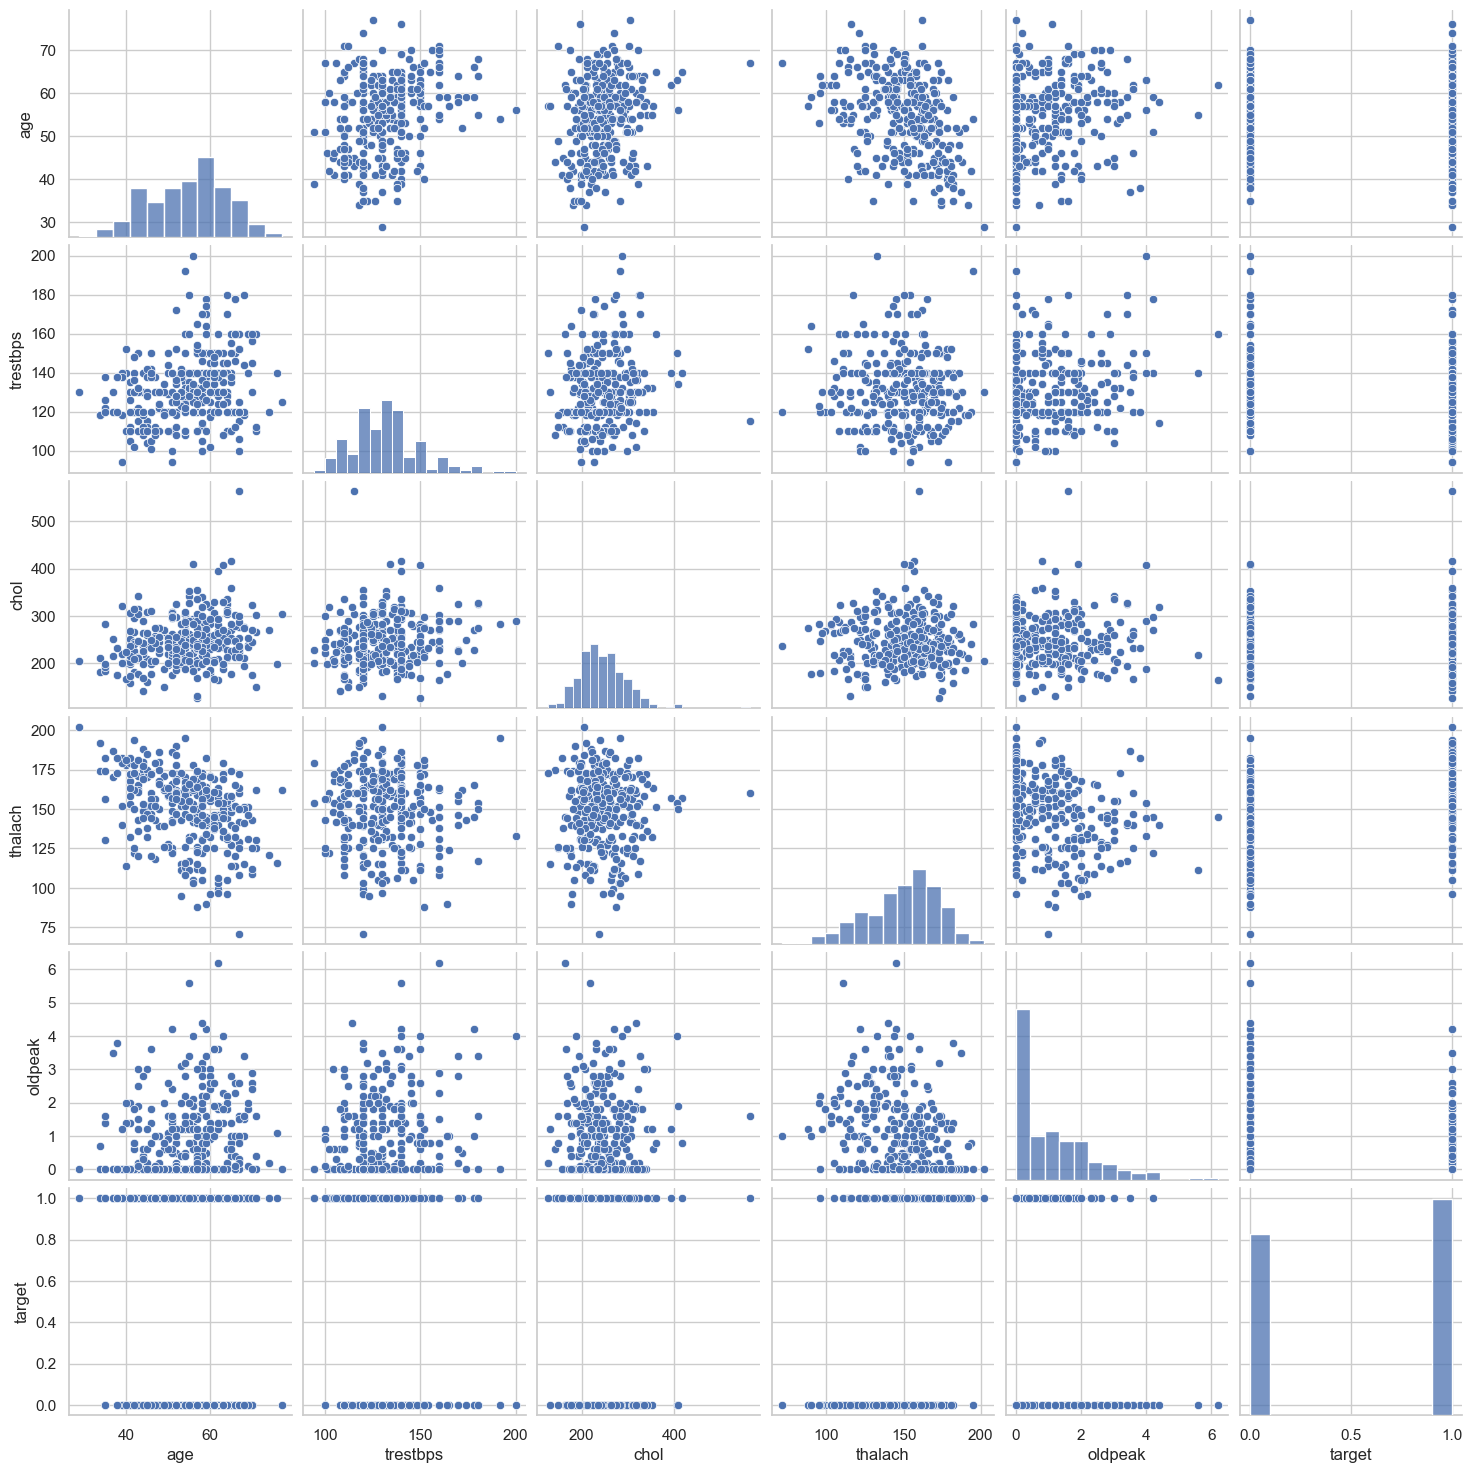

In [68]:
num_var=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

* Here  age, trestbps, chol, thalach and oldpeak are numerical variables and target is the categorical variable.
* So we check relationships between these variables.

**Analysis of age and other variables.**

In [71]:
# check no.of unique values in age variable
df['age'].nunique()

41

In [72]:
# statistical summary of age variable
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Interpretation
* mean age = 54.7
* min age= 29 and max age=77

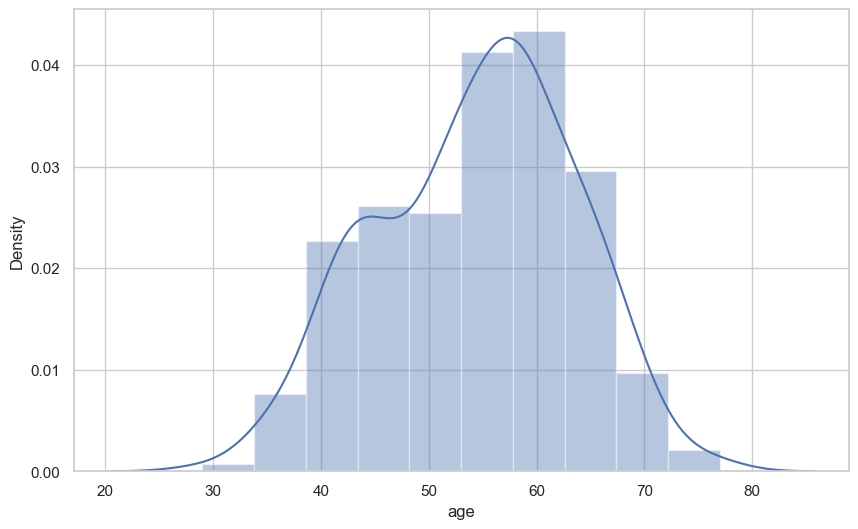

In [74]:
# plot distribution of age variable
f, ax= plt.subplots(figsize=(10,6))
x=df['age']
ax=sns.distplot(x,bins=10)
plt.show()

Interpretation
* The distribution of age is approximately normal

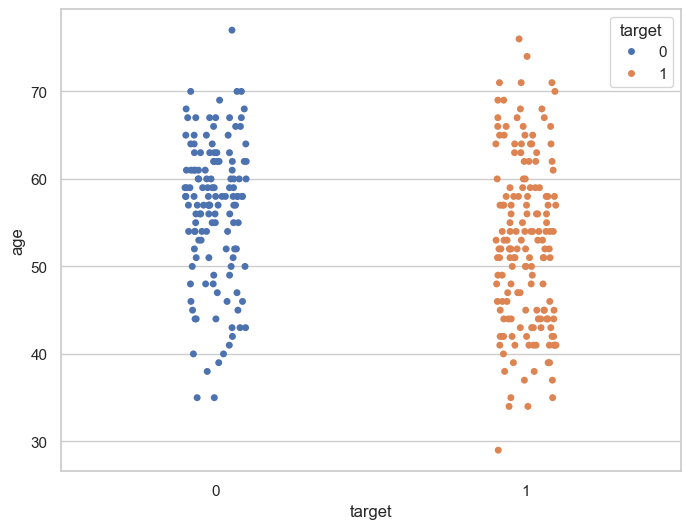

In [76]:
# analyze age and target variable.
# visualize frequency distribution of age w.r.t target
f, ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='age',data=df,hue='target')
plt.show()

Interpretation
* We observe the people who suffer from heat disease and do not suffer have comparable ages

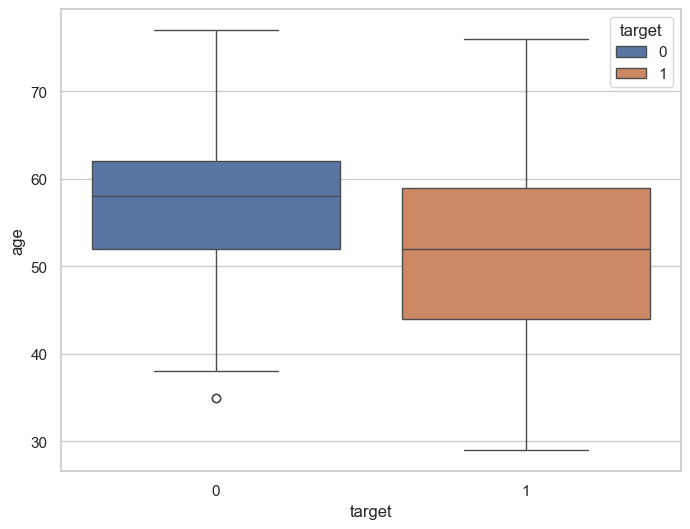

In [78]:
# visualization of age and target with boxplot.
f, ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='target',y='age',data=df,hue='target')
plt.show()

Interpretation
* The mean age of people who have heart disease is more that those who do not have.
* The dispersion or spread of age of the people who have heart disease is greater than the dispersion spread of people who do not have heart disease.

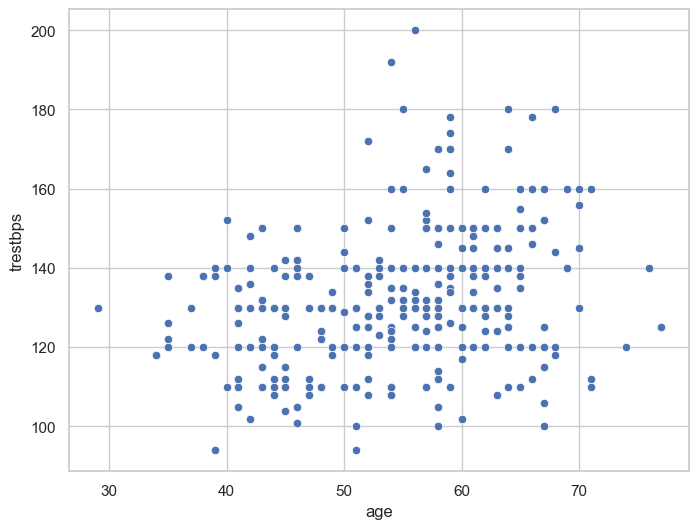

In [80]:
# analysis of age and trestbps variable.
# scatter plot to visualize the relationship between age and trestbps variable.
f, ax= plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='trestbps',data=df)
plt.show()

Interpretation
* We observe there is no correlation between age anf trestbps.

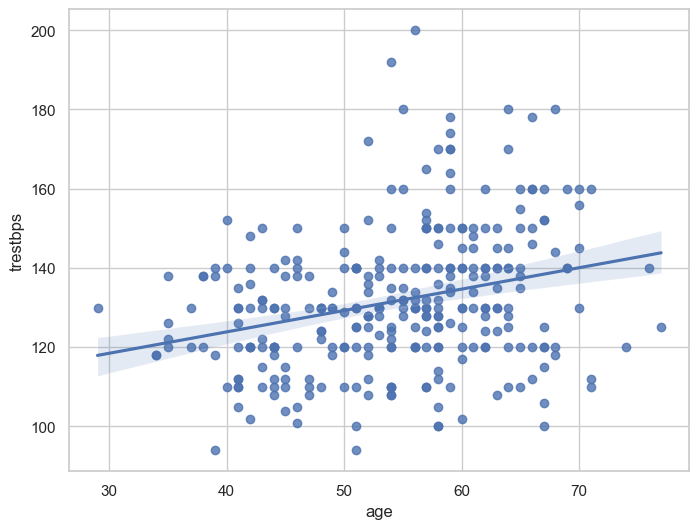

In [82]:
f, ax= plt.subplots(figsize=(8,6))
ax=sns.regplot(x='age',y='trestbps',data=df)
plt.show()

Interpretation
* The line in above plot shows that linear regression is not a good fit for the following data.

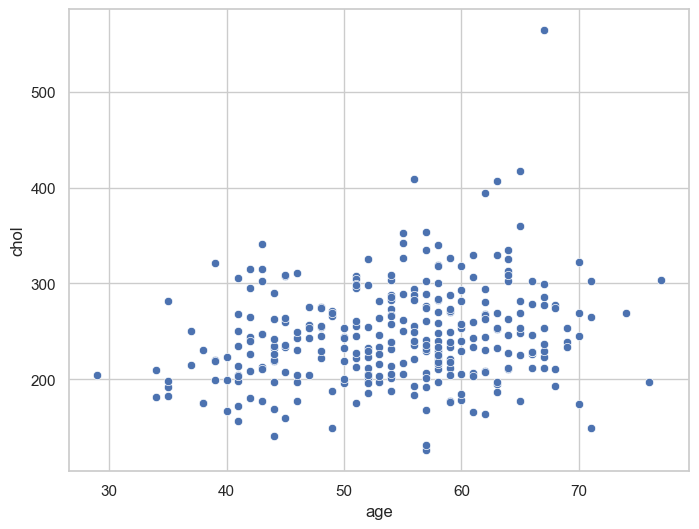

In [84]:
# Analyse age and chol variable
f, ax= plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='chol',data=df)
plt.show()

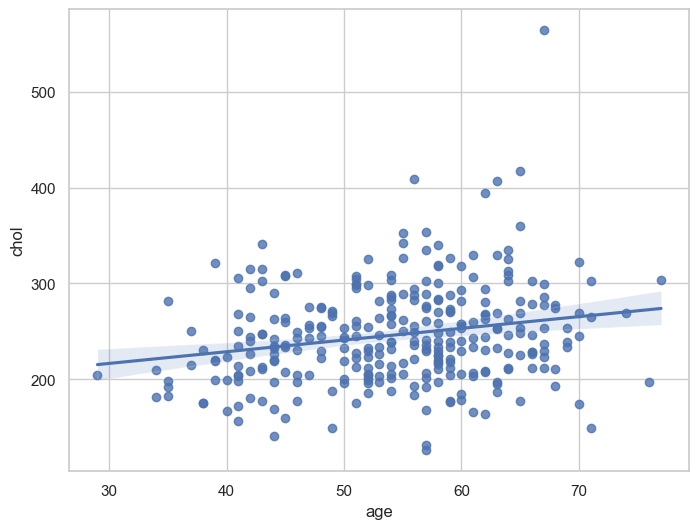

In [85]:
f, ax= plt.subplots(figsize=(8,6))
ax=sns.regplot(x='age',y='chol',data=df)
plt.show()

Interpretation
* The above plots confirm that there is a slightly positive correlation between age and chol variables.

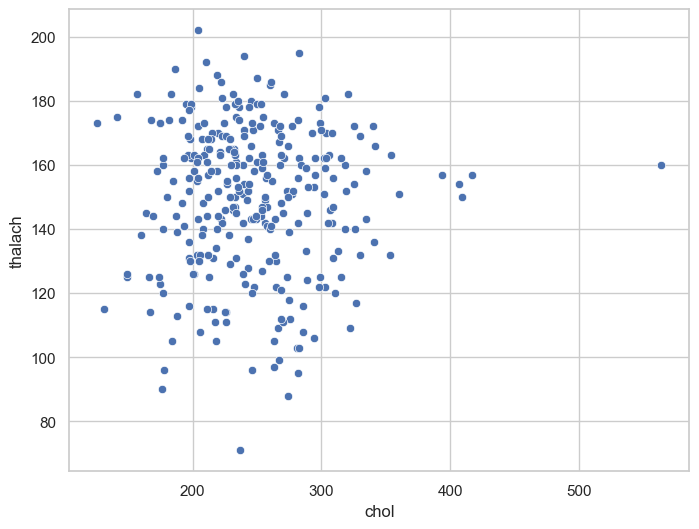

In [87]:
# Analyse chol and thalach variable
f, ax= plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='chol',y='thalach',data=df)
plt.show()

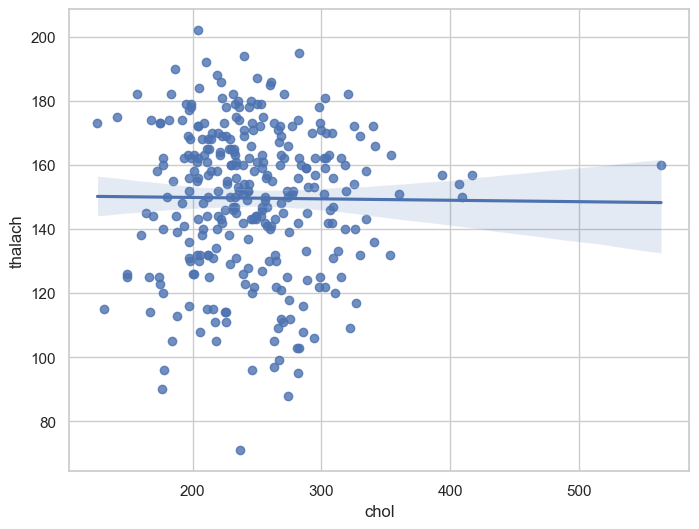

In [88]:
f, ax= plt.subplots(figsize=(8,6))
ax=sns.regplot(x='chol',y='thalach',data=df)
plt.show()

Interpretation
* The above plot shows that there is no correlation between chol and thalach.

**7. Dealing with missing values.**

In [91]:
# check for missing values.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Interpretation
* We can see that there are no missing values in the dataset.

**8. Check with assert statement.**

* assert statement is used to verify that there are no missing , unexpected 0 or negative values are present programically
* returns nothing if value being tested id true and will throw an Assertion if the value is false.

In [95]:
# assert that there are no missing values in the dataframe.
assert pd.notnull(df).all().all()

In [96]:
# assert that all values are greater than or equal to 0
assert (df>=0).all().all()

Interpretation
* The above two command throws no error. It is confirmed that there are no missing or negative values in the data set.
* All the values are greater than or equal to zero.

**9. Outlier detection**
* We will make boxplots to visualise the outliers in the continuous variables like age, trestbps, chol, thalach, and oldpeak variables.

*age variable*

In [100]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

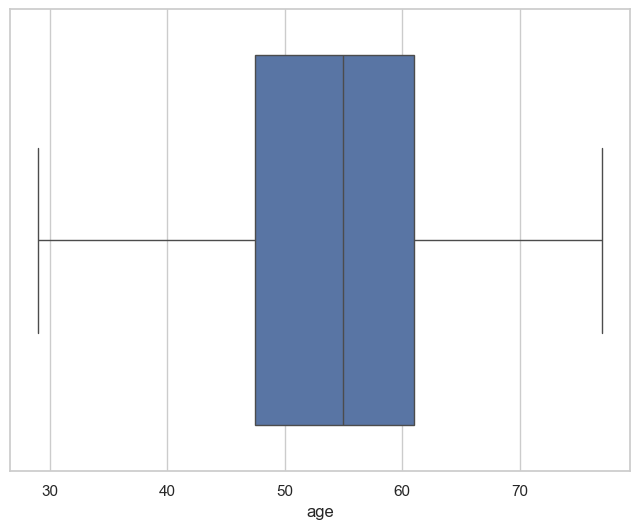

In [101]:
# boxplot of age variable.
f, ax= plt.subplots(figsize=(8,6))
ax=sns.boxplot(x=df['age'])
plt.show()

*trestbps variable*

In [103]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

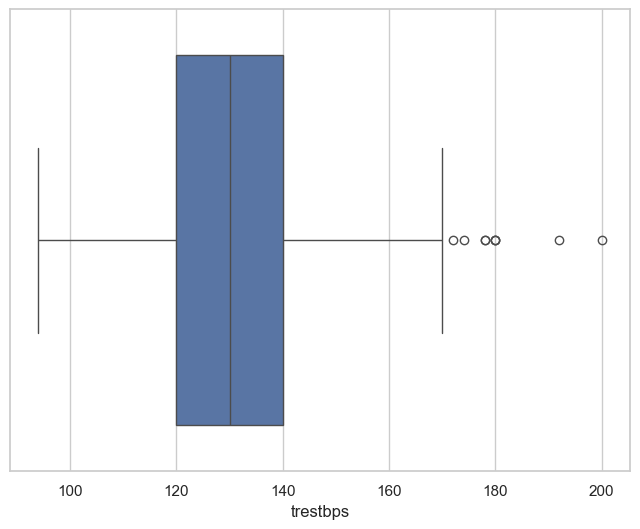

In [104]:
# boxplot of trestbps variable.
f, ax= plt.subplots(figsize=(8,6))
sns.boxplot(x=df['trestbps'])
plt.show()

*Chol Variable*

In [106]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

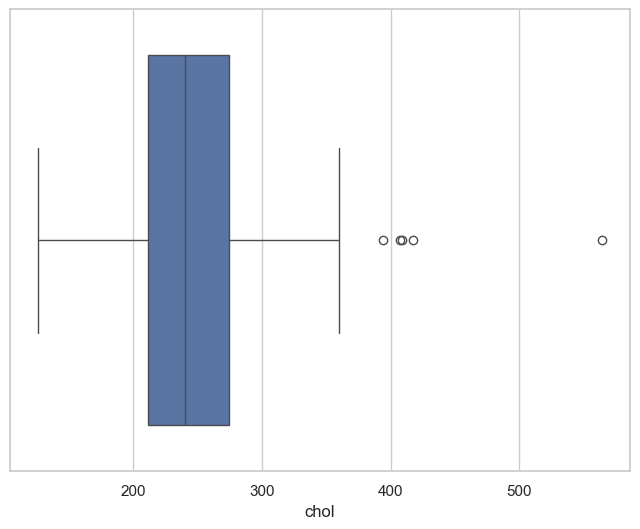

In [107]:
# boxplot of chol variable.
f, ax= plt.subplots(figsize=(8,6))
sns.boxplot(x=df['chol'])
plt.show()

*thalach variable*

In [109]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

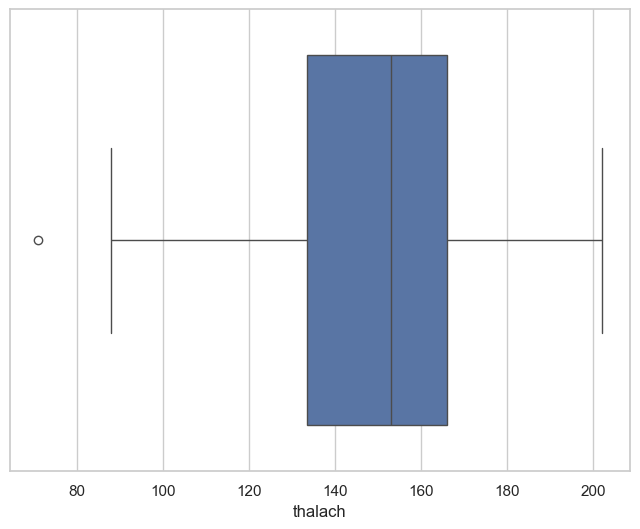

In [110]:
# boxplot of thalach variable.
f, ax= plt.subplots(figsize=(8,6))
sns.boxplot(x=df['thalach'])
plt.show()

*oldpeak variable*

In [112]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

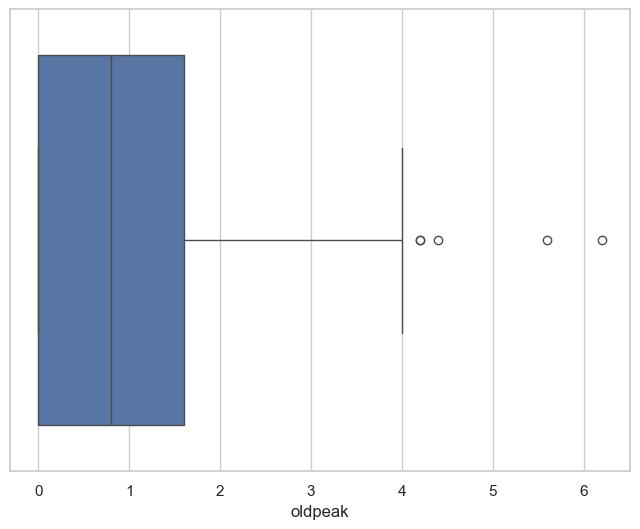

In [113]:
# boxplot of oldpeak variable.
f, ax= plt.subplots(figsize=(8,6))
sns.boxplot(x=df['oldpeak'])
plt.show()

Interpretation
* The age variable doesnot contain any outlier.
* The variables trestbps, chol, oldpeak conatins outliers to the right side.
* The thalach variable contains a single outlier to the left side.
* Those variables containing outliers needs to be further investigated. 

**10. Conclusion**
* We have investigated the heart disease dataset in this kernel. Many of the techniques Allen B. Downey outlines in his book Think Stats: Exploratory Data Analysis in Python have been incorporated into this kernel. The target variable is the feature variable of interest. We have examined it independently and examined how it interacts with other factors. We have also spoken about identifying outliers and missing data.

**11. References**
* Think Stats - Exploratory Data Analysis in Python by Allen B Downey
* 
Seaborn API referen
* My
My other kernel